In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [39]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df["Balance"] = (
    df["Balance"]
    .astype(str)
    .str.replace(".", "", regex=False)   # hapus koma ribuan
    .str.replace(" ", "", regex=False)   # hapus spasi
)

df["Balance"] = pd.to_numeric(df["Balance"], errors="coerce")


In [41]:
df['Balance'].isnull().sum()

np.int64(0)

In [42]:
df["EstimatedSalary"] = (
    df["EstimatedSalary"]
    .astype(str)
    .str.replace(".", "", regex=False)   # hapus koma ribuan
    .str.replace(" ", "", regex=False)   # hapus spasi
)

df["EstimatedSalary"] = pd.to_numeric(df["EstimatedSalary"], errors="coerce")

In [43]:
df['EstimatedSalary'].isnull().sum()

np.int64(0)

In [44]:
print("Shape:", df.shape)


Shape: (10000, 14)


In [45]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int64 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int64 
 13  Exited           10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,6.988245e+06,1.530200,0.70550,0.515100,9.098289e+06,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,6.278107e+06,0.581654,0.45584,0.499797,6.115941e+06,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,1.158000e+03,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


In [46]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df = df.drop(["RowNumber", "Surname"], axis=1)
df.head()


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [49]:
df["Exited"].value_counts()


,count
Exited,
0,7963
1,2037


In [50]:
churn_rate = df["Exited"].mean()
print("Churn Rate:", round(churn_rate*100,2), "%")


Churn Rate: 20.37 %


In [51]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "65+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


In [52]:
balance_bins = [-1, 0, 50000, 100000, 150000, 200000, 300000]
balance_labels = ["0", "0-50k", "50-100k", "100-150k", "150-200k", "200k+"]

df["BalanceGroup"] = pd.cut(df["Balance"], bins=balance_bins, labels=balance_labels)


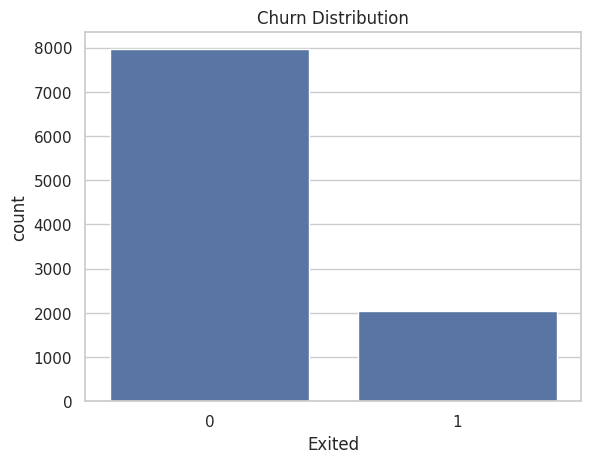

In [53]:
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()


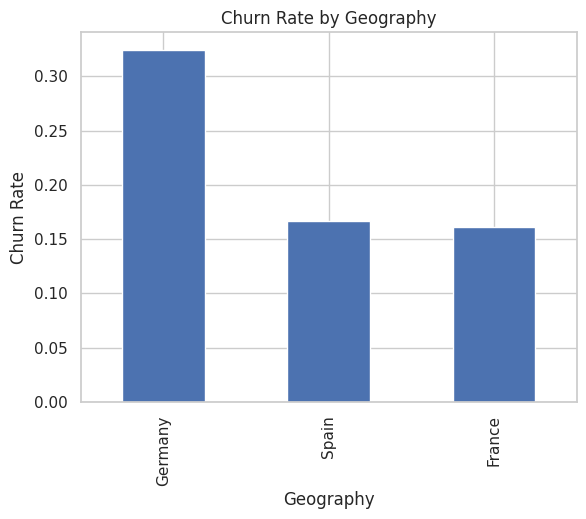

Geography
Germany    0.324432
Spain      0.166734
France     0.161548
Name: Exited, dtype: float64


In [54]:
geo_churn = df.groupby("Geography")["Exited"].mean().sort_values(ascending=False)

geo_churn.plot(kind="bar")
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
plt.show()

print(geo_churn)


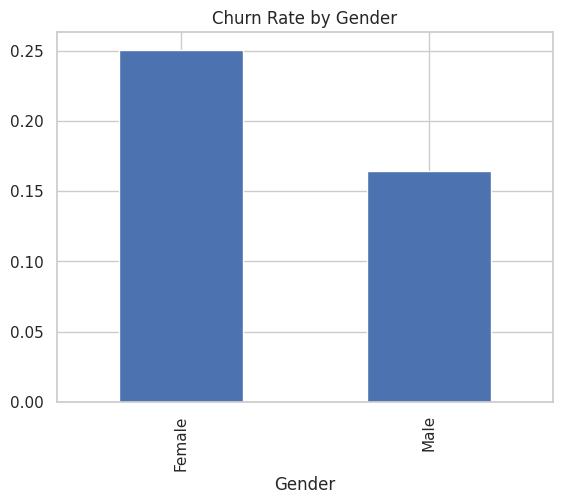

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


In [55]:
gender_churn = df.groupby("Gender")["Exited"].mean()

gender_churn.plot(kind="bar")
plt.title("Churn Rate by Gender")
plt.show()

print(gender_churn)


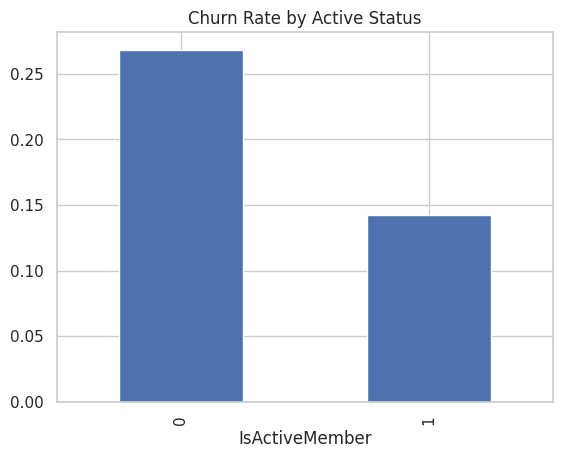

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


In [56]:
active_churn = df.groupby("IsActiveMember")["Exited"].mean()

active_churn.plot(kind="bar")
plt.title("Churn Rate by Active Status")
plt.show()

print(active_churn)


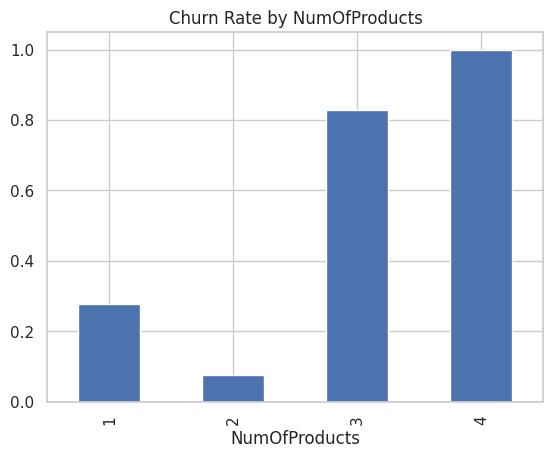

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


In [57]:
product_churn = df.groupby("NumOfProducts")["Exited"].mean()

product_churn.plot(kind="bar")
plt.title("Churn Rate by NumOfProducts")
plt.show()

print(product_churn)


/tmp/ipython-input-1512928283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby("AgeGroup")["Exited"].mean()


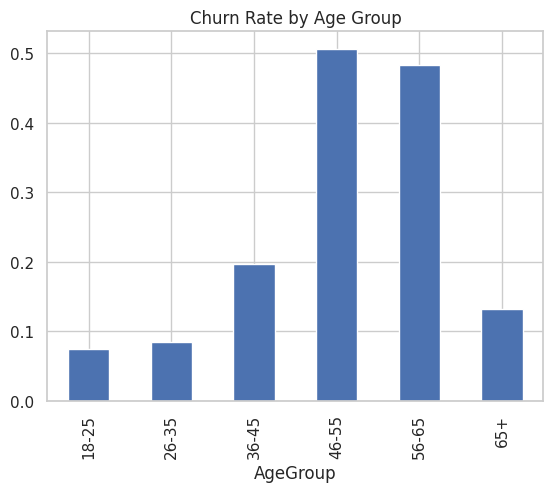

AgeGroup
18-25    0.074703
26-35    0.084980
36-45    0.196199
46-55    0.505721
56-65    0.483209
65+      0.132576
Name: Exited, dtype: float64


In [58]:
age_churn = df.groupby("AgeGroup")["Exited"].mean()

age_churn.plot(kind="bar")
plt.title("Churn Rate by Age Group")
plt.show()

print(age_churn)


/tmp/ipython-input-737707687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby("BalanceGroup")["Exited"].mean()


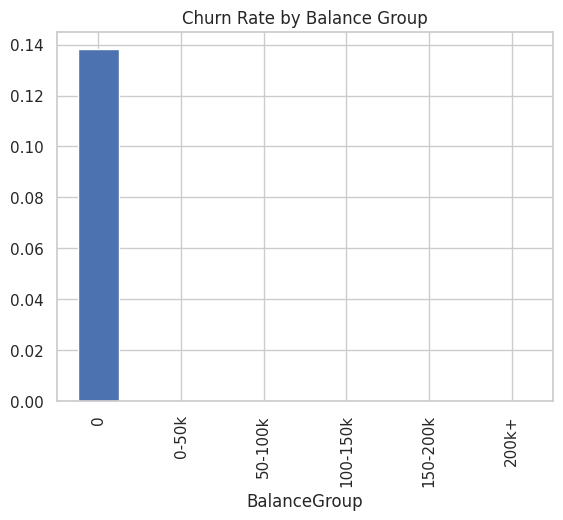

BalanceGroup
0           0.138236
0-50k            NaN
50-100k          NaN
100-150k    0.000000
150-200k         NaN
200k+            NaN
Name: Exited, dtype: float64


In [59]:
balance_churn = df.groupby("BalanceGroup")["Exited"].mean()

balance_churn.plot(kind="bar")
plt.title("Churn Rate by Balance Group")
plt.show()

print(balance_churn)


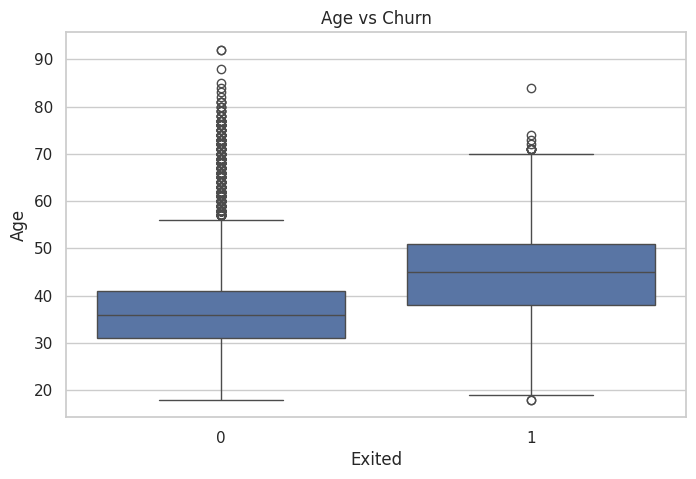

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()


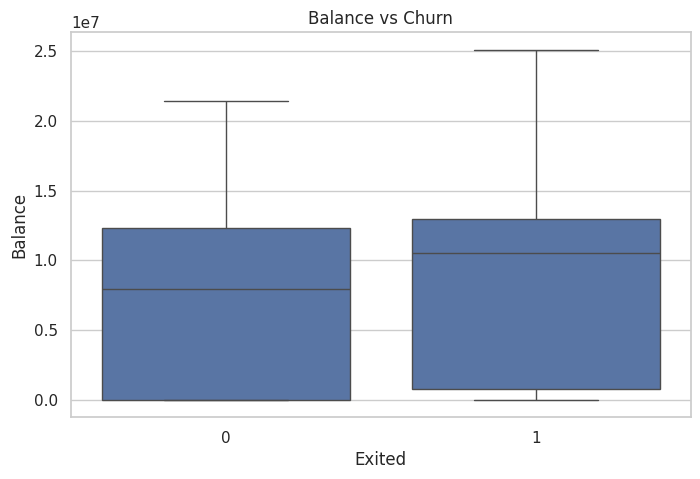

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()


In [62]:
segment = df.groupby(["Geography", "IsActiveMember", "AgeGroup", "NumOfProducts"]) \
            .agg(
                churn_rate=("Exited", "mean"),
                total_customer=("Exited", "count")
            ) \
            .reset_index()

segment = segment.sort_values("churn_rate", ascending=False)

segment.head(10)


/tmp/ipython-input-4246469950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment = df.groupby(["Geography", "IsActiveMember", "AgeGroup", "NumOfProducts"]) \


,Geography,IsActiveMember,AgeGroup,NumOfProducts,churn_rate,total_customer
2,France,0,18-25,3,1.0,1
11,France,0,36-45,4,1.0,5
7,France,0,26-35,4,1.0,2
16,France,0,56-65,1,1.0,56
18,France,0,56-65,3,1.0,6
14,France,0,46-55,3,1.0,16
31,France,1,26-35,4,1.0,1
15,France,0,46-55,4,1.0,5
42,France,1,56-65,3,1.0,5
39,France,1,46-55,4,1.0,5


In [63]:
high_risk = segment[segment["total_customer"] > 50]
high_risk.head(10)


,Geography,IsActiveMember,AgeGroup,NumOfProducts,churn_rate,total_customer
16,France,0,56-65,1,1.000000,56
60,Germany,0,46-55,1,0.870130,154
108,Spain,0,46-55,1,0.674157,89
12,France,0,46-55,1,0.658163,196
84,Germany,1,46-55,1,0.630631,111
56,Germany,0,36-45,1,0.466667,270
36,France,1,46-55,1,0.438710,155
61,Germany,0,46-55,2,0.415094,53
80,Germany,1,36-45,1,0.358209,201
132,Spain,1,46-55,1,0.293478,92


In [64]:
revenue_at_risk = df[df["Exited"] == 1]["Balance"].sum()
print("Total Balance of Churned Customers:", revenue_at_risk)


Total Balance of Churned Customers: 16921734834


In [65]:
df.to_csv("churn_cleaned2.csv", index=False)
